#### CS164 Pre-Class Work for Session 14.1

### Mixed-Integer Programming
_Yoav Rabinovich, Apr 2020_

-------------------

Vehicle trajectory optimization with variables. Exercise found [here](https://course-resources.minerva.kgi.edu/uploaded_files/mke/00129427-8778/preclasswork-mip.pdf). Code template found [here](https://github.com/rohanshekhar/CS164/blob/master/Trajectory_Optimization.ipynb://).

Grader: Notice the lack of list comprehension by use of axis-wise operations! (and redefining obsRHS)

In [95]:
import cvxpy as cvx
import numpy as np

# Input constraints
max_inp = 0.2

N = 15 # Steps

# Define the target state and obstacles in half-space form
targetLHS = np.array([[-1, 0],[0, -1],[1, 0],[0, 1]])
targetRHS = np.array([-9.5,-9.5,10.5,10.5]).T

# Matrix to extract the two position states
posMatrix = np.matrix('1,0,0,0;0,1,0,0')

# Define the obstacle
obsLHS = targetLHS
obsRHS = np.array([-3.5,-3.5,6.5,6.5])
obsRHS = np.repeat(obsRHS.reshape(4,1),N,axis=1)

# Vertices of the obstacle
obsVerts = np.asarray([[3.5,3.5,6.5,6.5,3.5],[3.5,6.5,6.5,3.5,3.5]])

# Define the system matrices
A = np.matrix('1,0,1,0;0,1,0,1;0,0,1,0;,0,0,0,1')
B = np.matrix('0.5,0;0,0.5;1,0;0,1')

# Define the decision variables
X = cvx.Variable((4,N+1))
U = cvx.Variable((2,N))
b = cvx.Variable((4,N), boolean=True)

#### Define the Big-M constraint here ####
M = 100

## Initial condition
con = [X[:,0] == np.array([0,0,0,0])]
## Dynamics
con.extend([X[:,1:] == A@X[:,:-1]+B@U]) 
## Input constraints
con.extend([cvx.norm_inf(U) <= 0.5])
## obstacle avoidance
con.extend([obsLHS@posMatrix@X[:,1:] >= obsRHS-M*b]) 
con.extend([cvx.sum(b,axis=0) <= 3])
## Terminal constraint 
con.extend([targetLHS@posMatrix@X[:,N] <= targetRHS])

#### Define the objective (minimize 1-norm of input) ####
obj = cvx.Minimize(cvx.sum(cvx.norm1(U)))

# Solve the optimization problem
prob = cvx.Problem(obj, con)
prob.solve()

1.7058823529411766

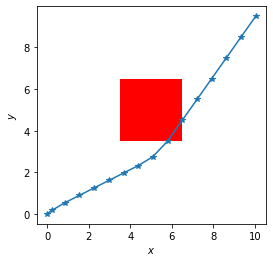

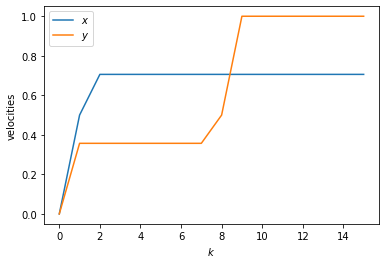

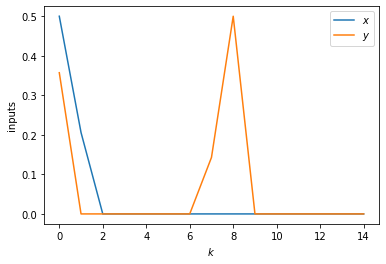

In [96]:
#### Plotting code ####
## Your plots should look like the ones below if your code is correct.

import matplotlib.pyplot as plt
x_vals = X.value.T
u_vals = U.value.T
plt.figure()
plt.plot(x_vals[:,0],x_vals[:,1],'*-')
plt.fill(obsVerts[0,:],obsVerts[1,:],'r')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axis('scaled')
plt.show()

plt.figure()
plt.plot(np.arange(0,N+1).T,x_vals[:,2],'-',label='$x$')
plt.plot(np.arange(0,N+1).T,x_vals[:,3],'-',label='$y$')
plt.xlabel('$k$'); plt.ylabel('velocities')
plt.legend()
plt.show()

plt.figure()
plt.plot(np.arange(0,N).T,u_vals[:,0],'-',label='$x$')
plt.plot(np.arange(0,N).T,u_vals[:,1],'-',label='$y$')
plt.xlabel('$k$'); plt.ylabel('inputs')
plt.legend()
plt.show()